# UTILIZAÇÃO DE UMA API CRIADA COM O FLASK, LOCALMENTE

## Criação do Modelo que iremos implementar como uma API
Iremos inicialmente implementar o modelo localmente e posteriormente na internet com o tradicional Titanic Survivors Dataset. :)

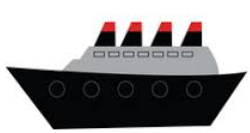

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# create df
train = pd.read_csv('titanic.csv')

# drop null values
train.dropna(inplace=True)

# features and target
target = 'Survived'
features = ['Pclass', 'Age', 'SibSp', 'Fare']

In [ ]:
train.head(10)

In [ ]:
plt.hist(train['Pclass'])

In [ ]:
plt.hist(train['Age'])

In [ ]:
# SibSp = (number of siblings on board) / (number of spouse on board)
plt.hist(train['SibSp'])

In [ ]:
plt.hist(train['Fare'])

In [ ]:
# X matrix, y vector
X = train[features]
y = train[target]

In [ ]:
# Vamos utilizar o Random Forest
model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(X, y)
model.score(X,y)

In [ ]:

# parâmetros de entrada:
classe = 1
idade = 20
qtdParentes = 2
passagem = 200


# dados da chamada ao serviço
data = {'Pclass': classe, 'Age': idade, 'SibSp': qtdParentes, 'Fare': passagem}
data.update((x, [y]) for x, y in data.items())
data_df = pd.DataFrame.from_dict(data)
# resultado do modelo - 0 - não sobreviveu / 1 - sobreviveu
result = model.predict(data_df)
print(result)

## Persistência do Modelo com o Pickle

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

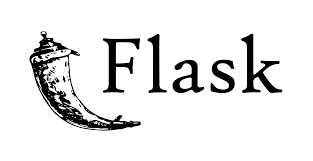


## Agora vamos analisar o arquivo "api_titanic.py", disponibilizado junto com o material

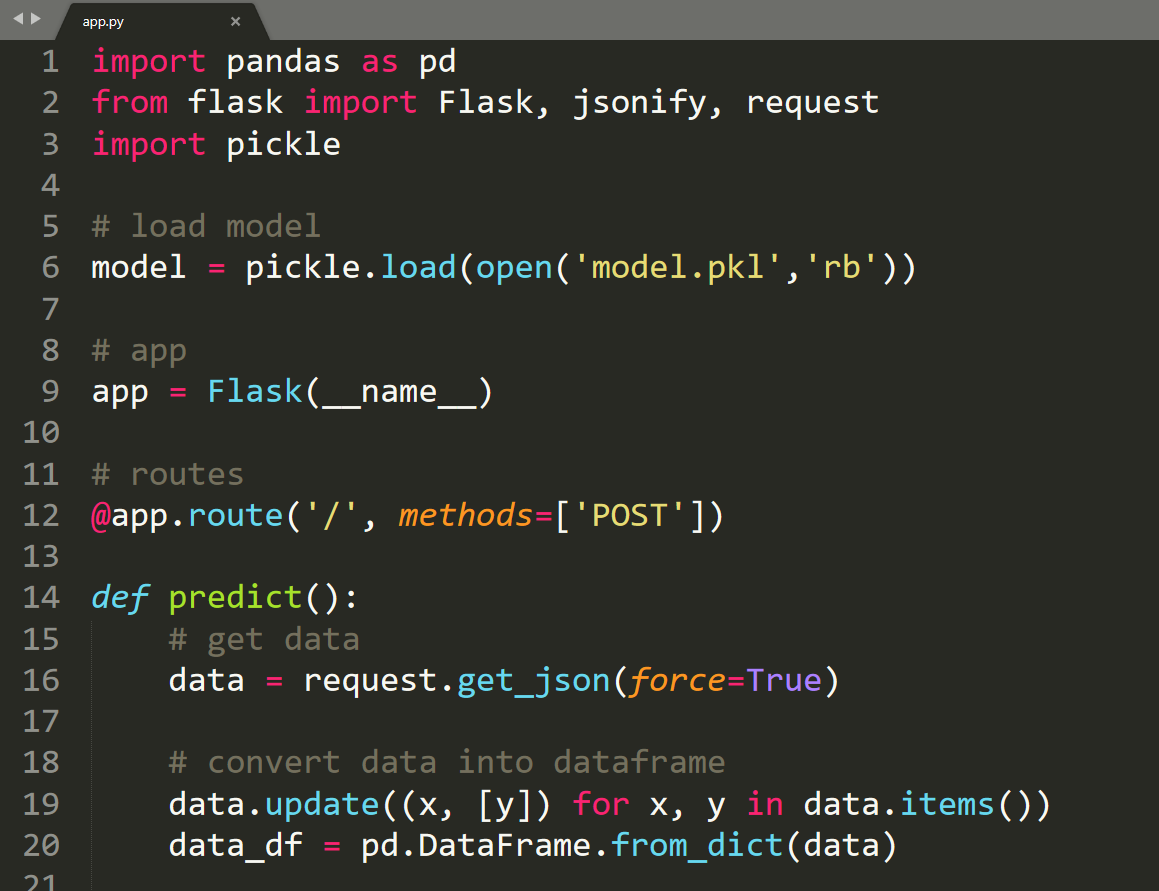

## Teste Local com o Flask
Executar o script app.py pelo prompt para disponibilizar o serviço localmente  

In [ ]:
import requests
import json

In [ ]:
# url local - definida no app.py - executada pelo Flask
url = 'http://127.0.0.1:5000'

# parâmetros de entrada:
classe = 1
idade = 200
qtdParentes = 2
passagem = 200


# dados da chamada ao serviço
data = {'Pclass': classe, 'Age': idade, 'SibSp': qtdParentes, 'Fare': passagem}

data = json.dumps(data)
data

In [ ]:
# chamada do serviço com o método POST
send_request = requests.post(url, data)
print(send_request)

In [ ]:
print(send_request.json())